In [2]:
import prepare
import acquire 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as knc
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
#acquire titanic data

In [3]:
df = acquire.get_titanic_data()

In [ ]:
#prep titanic data

In [4]:
df.dropna(inplace=True)

In [5]:
df.head()

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
6,6,6,0,1,male,54.0,0,0,51.8625,S,First,E,Southampton,1
10,10,10,1,3,female,4.0,1,1,16.7000,S,Third,G,Southampton,0
11,11,11,1,1,female,58.0,0,0,26.5500,S,First,C,Southampton,1


In [6]:
df = prepare.clean_titanic_data(df)
df.head()

,Unnamed: 0,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
1,1,1,1,38.0,1,0,71.2833,0,0,0,0
3,3,1,1,35.0,1,0,53.1000,0,0,0,1
6,6,0,1,54.0,0,0,51.8625,1,1,0,1
10,10,1,3,4.0,1,1,16.7000,0,0,0,1
11,11,1,1,58.0,0,0,26.5500,1,0,0,1


In [7]:
df = df.drop(columns= 'Unnamed: 0')
df.head(3)

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
1,1,1,38.0,1,0,71.2833,0,0,0,0
3,1,1,35.0,1,0,53.1000,0,0,0,1
6,0,1,54.0,0,0,51.8625,1,1,0,1


In [8]:
train, validate, test = prepare.split_titanic_data(df)

In [9]:
X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [10]:
X_train.shape, X_validate.shape, X_test.shape

((101, 9), (44, 9), (37, 9))

In [11]:
print(f'train columns:\n{train.columns.to_list()}\n\n')
print(f'X_train columns:\n{X_train.columns.to_list()}\n\n')
print(f'X_validate columns:\n{X_validate.columns.to_list()}\n\n')


train columns:
['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'alone', 'sex_male', 'embark_town_Queenstown', 'embark_town_Southampton']


X_train columns:
['pclass', 'age', 'sibsp', 'parch', 'fare', 'alone', 'sex_male', 'embark_town_Queenstown', 'embark_town_Southampton']


X_validate columns:
['pclass', 'age', 'sibsp', 'parch', 'fare', 'alone', 'sex_male', 'embark_town_Queenstown', 'embark_town_Southampton']




In [33]:
knn = knc(n_neighbors=1) 

X_train = train.drop(columns=['survived'])
y_train = train.survived

In [34]:
# Fit the model

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [35]:
y_pred = knn.predict(X_train)

In [36]:
t_score = knn.score(X_train, y_train)

In [37]:
t_score

1.0

In [38]:
#print the classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        68

    accuracy                           1.00       101
   macro avg       1.00      1.00      1.00       101
weighted avg       1.00      1.00      1.00       101



In [ ]:
# Display Conusion Matrix

In [17]:
conf = confusion_matrix(y_train, y_pred)
conf

array([[33,  0],
       [ 0, 68]])

In [20]:
TP, FP, FN, TN = conf.ravel()
TP, FP, FN, TN

(33, 0, 0, 68)

In [22]:
recall = TP / (TP + FN)
precision = TP/ (TP + FN)
tru_pos_rate = recall
false_pos_rate = FP / (FP + TN)
tru_neg_rate = TN / (TN + FP)
false_neg_rate = FN / (FN + TP)

In [24]:
print(f'''
True Positive Rate is {tru_pos_rate}
False Positive Rate is {false_pos_rate}
True Negative Rate is {tru_neg_rate}
False Negative Rate is {false_neg_rate}
''')


True Positive Rate is 1.0
False Positive Rate is 0.0
True Negative Rate is 1.0
False Negative Rate is 0.0



In [39]:
recall_list = []
precision_list = []
tru_pos_rate_list = []
false_pos_rate_list = []
tru_neg_rate_list = []
false_neg_rate_list = []

for i in range(1, 21):  
    knn = knc(n_neighbors=i) 

    X_train = train.drop(columns=['survived'])
    y_train = train.survived

    # Fit the model
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_train)
    t_score = knn.score(X_train, y_train)
    t_score

    #print the classification report
    print(f'k = {i}')
    print(classification_report(y_train, y_pred))


    # Display Conusion Matrix
    conf
    conf = confusion_matrix(y_train, y_pred)
    print(conf)

    TP, FP, FN, TN = conf.ravel()


    recall = TP / (TP + FN)
    precision = TP/ (TP + FN)
    tru_pos_rate = recall
    false_pos_rate = FP / (FP + TN)
    tru_neg_rate = TN / (TN + FP)
    false_neg_rate = FN / (FN + TP)
    
    recall_list.append(recall)
    precision_list.append(precision)
    tru_pos_rate_list.append(tru_pos_rate)
    false_pos_rate_list.append(false_pos_rate)
    tru_neg_rate_list.append(tru_neg_rate)
    false_neg_rate_list.append(false_neg_rate)

    print(f'''
    True Positive Rate is {tru_pos_rate}
    False Positive Rate is {false_pos_rate}
    True Negative Rate is {tru_neg_rate}
    False Negative Rate is {false_neg_rate}
    ''')

k = 1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        68

    accuracy                           1.00       101
   macro avg       1.00      1.00      1.00       101
weighted avg       1.00      1.00      1.00       101

[[33  0]
 [ 0 68]]

    True Positive Rate is 1.0
    False Positive Rate is 0.0
    True Negative Rate is 1.0
    False Negative Rate is 0.0
    
k = 2
              precision    recall  f1-score   support

           0       0.57      1.00      0.73        33
           1       1.00      0.63      0.77        68

    accuracy                           0.75       101
   macro avg       0.78      0.82      0.75       101
weighted avg       0.86      0.75      0.76       101

[[33  0]
 [25 43]]

    True Positive Rate is 0.5689655172413793
    False Positive Rate is 0.0
    True Negative Rate is 1.0
    False Negative Rate is 0.43103448275862066
    
k = 3
   

In [46]:
n = [x for x in range(1, 21)]
n

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [51]:
n = pd.Series(n)

In [63]:
y = pd.Series(recall_list)

In [67]:
x = pd.DataFrame({
    'recall': y,
    'n': n
})

In [72]:
x.head()

,recall,n
0,1.000000,1
1,0.568966,2
2,0.800000,3
3,0.594595,4
4,0.705882,5


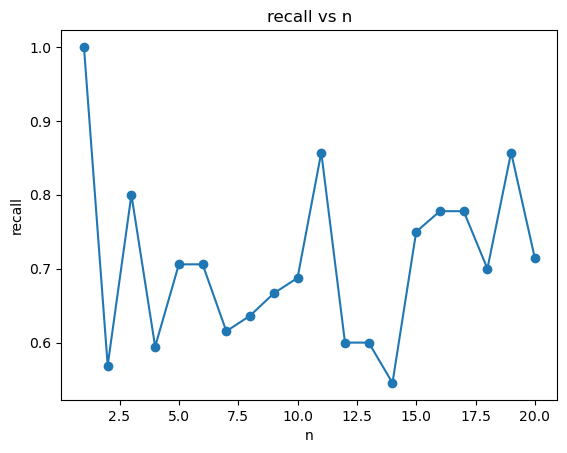

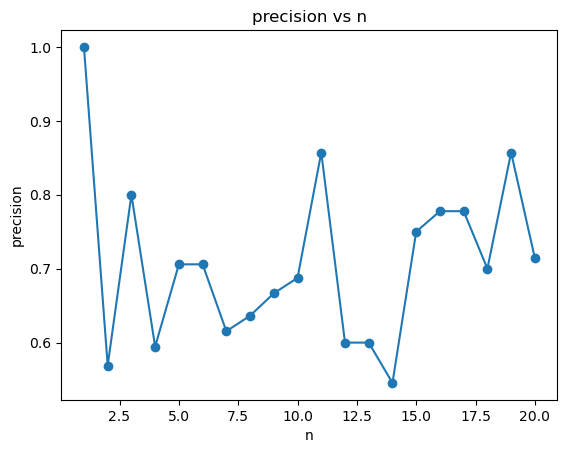

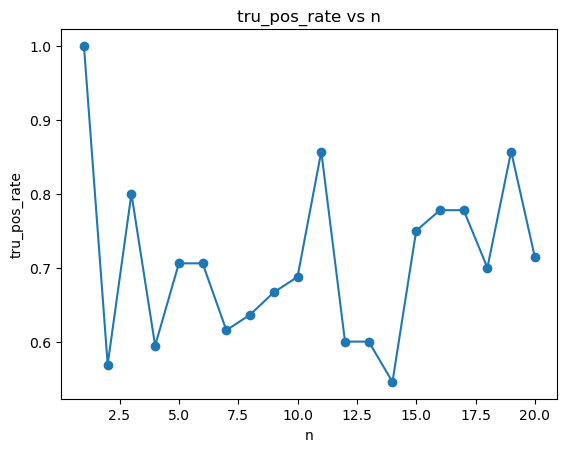

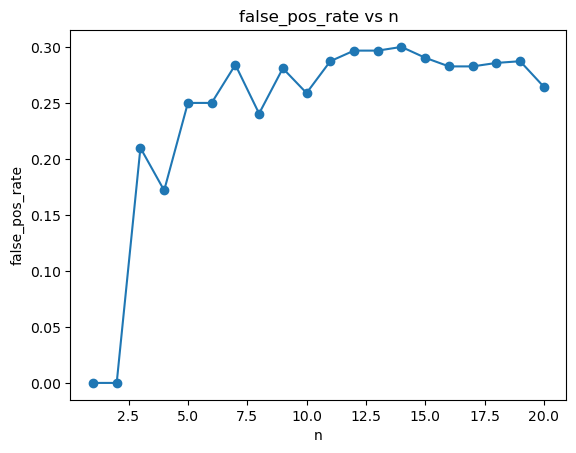

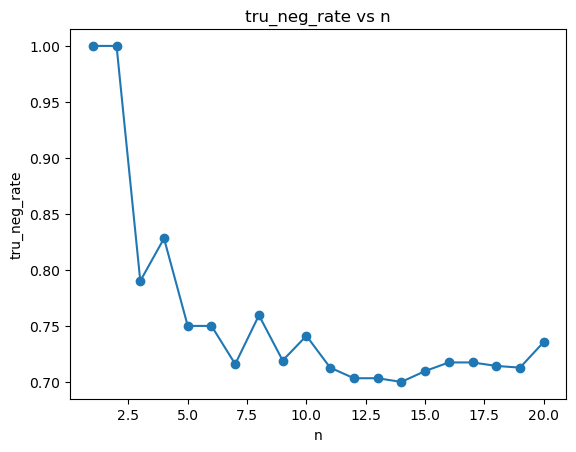

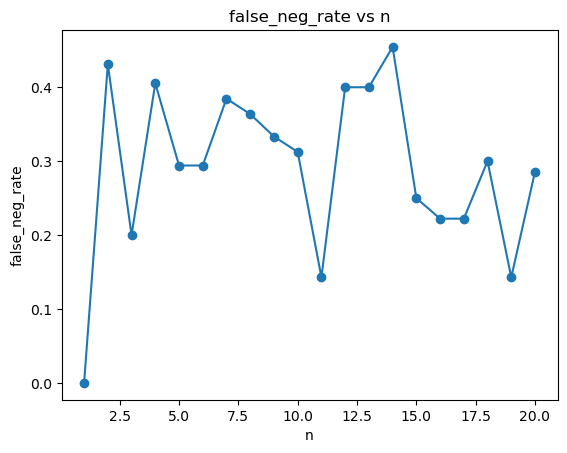

In [75]:
strings = ['recall', 'precision', 'tru_pos_rate', 'false_pos_rate', 'tru_neg_rate', 'false_neg_rate']
lists = [recall_list, precision_list, tru_pos_rate_list, false_pos_rate_list, tru_neg_rate_list, false_neg_rate_list]

for i in range(6):

    n = pd.Series(n)

    y = pd.Series(lists[i])

    x = pd.DataFrame({
        strings[i]: y,
        'n': n
    })
    
    plt.plot(x['n'], x[strings[i]], marker='o')
    plt.xlabel('n')
    plt.ylabel(strings[i])
    plt.title(f'{strings[i]} vs n')
    plt.show()

### Recall starts at 100% then goes up and down unpredictably
### Precision starts at 100% then goes up and down unpredictably
### True Positive Rate starts at 100% then goes up and down unpredictably
### False Postive Rate starts at 0 then climbs to around .8 and stays there
### True Negative Rate starts at 1 then drops to around .72 and stays there
### False Negative rate starts at 0 then goes up and down unpredictably

In [81]:
from sklearn.metrics import accuracy_score

In [90]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [93]:
train['baseline_model'] = int(train.survived.mode())
train_accuracy_score = accuracy_score(train.survived, train.baseline_model)

validate['baseline_model'] = int(train.survived.mode())
validate_accuracy_score = accuracy_score(validate.survived, validate.baseline_model)

In [96]:
metrics = []

for k in range(1, 21):
    #MAKE the thing
    knn = knc(n_neighbors=k)
    
    #FIT the thing
    knn.fit(X_train, y_train)
    
    #USE the thing
    train_score= knn.score(X_train, y_train)
    validate_score = knn.score(X_train, y_train)
    
    # create a dictionary of scores
    output = {
        "k": k,
        "train_score": train_score,
        "validate_score": validate_score,
        "difference": train_score - validate_score,
        "train_baseline_diff": train_accuracy_score - train_score,
        "val_baseline_diff": validate_accuracy_score - validate_score
    }
    
    metrics.append(output)

In [98]:
pd.DataFrame(metrics)

,k,train_score,validate_score,difference,train_baseline_diff,val_baseline_diff
0,1,1.000000,1.000000,0.0,-0.326733,-0.318182
1,2,0.752475,0.752475,0.0,-0.079208,-0.070657
2,3,0.792079,0.792079,0.0,-0.118812,-0.110261
3,4,0.742574,0.742574,0.0,-0.069307,-0.060756
4,5,0.742574,0.742574,0.0,-0.069307,-0.060756
5,6,0.742574,0.742574,0.0,-0.069307,-0.060756
6,7,0.702970,0.702970,0.0,-0.029703,-0.021152
7,8,0.732673,0.732673,0.0,-0.059406,-0.050855
8,9,0.712871,0.712871,0.0,-0.039604,-0.031053
9,10,0.732673,0.732673,0.0,-0.059406,-0.050855
